<a href="https://colab.research.google.com/github/tigresolarte21-hub/entregable-4/blob/main/Entregable_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <h1>Inteligencia Artificial - Nivel Básico</h1>
  <hr>
  <h3><b>Presentado por: </b></h3>
  Ernesto solarte flores
  <br><br>
  <h3><b>Curso</b></h3>
  <b>Curso:</b> IA NOCTURNO
  <br>
  <b>Grupo:</b> G 2025
  <br>
  <b>Período:</b> JULIO-SEPTIEMBRE 2025
  <br><br>
  <h3><b>Equipo Académico</b></h3>
  <ul>
   <h6>Alejandra Lozano</h6>
   <h6>Felipe Zuñiga</h6>
   <h6>Alexander Redondo</h6>
  </ul>
  <hr>
</center>

 1. Clasificar dígitos escritos a mano usando un clasificador supervisado.

Dataset digits: (1797, 64) labels: [0 1 2 3 4 5 6 7 8 9]

Entrenando SVM (linear) ...
  Test accuracy: 0.9796

Entrenando KNN (k=5) ...
  Test accuracy: 0.9704

Entrenando RandomForest ...
  Test accuracy: 0.9667

Entrenando MLP (1 hidden layer) ...
  Test accuracy: 0.9778

Mejor clasificador: SVM (linear) (accuracy = 0.9796)

Classification Report (mejor modelo):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        54
           1     0.9153    0.9818    0.9474        55
           2     1.0000    1.0000    1.0000        53
           3     0.9818    0.9818    0.9818        55
           4     1.0000    1.0000    1.0000        54
           5     1.0000    0.9636    0.9815        55
           6     0.9815    0.9815    0.9815        54
           7     0.9818    1.0000    0.9908        54
           8     1.0000    0.8846    0.9388        52
           9     0.9474    1.0000    0.9730        54

    accuracy                         

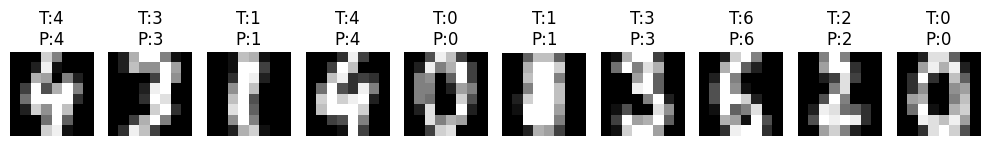


Saved scaler and model to 'models_digits/'


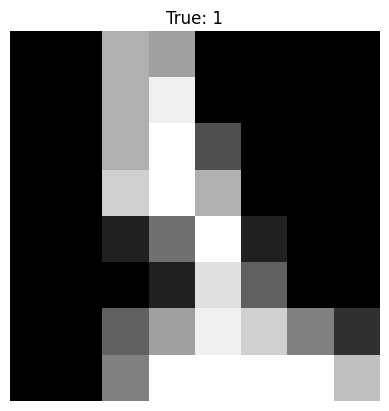

Predicción ejemplo: 1
Probabilidades: [0.002 0.954 0.008 0.004 0.002 0.007 0.004 0.    0.004 0.015]


In [1]:

# Clasificación de dígitos escritos a mano (dataset `digits` - 8x8)
# Requiere: scikit-learn, matplotlib, pillow, joblib
# Instala dependencias en Colab con:
# !pip install scikit-learn matplotlib pillow joblib

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import adjusted_rand_score
import warnings
warnings.filterwarnings("ignore")
import joblib
from PIL import Image
import os

# -------------------------
# 1) Cargar dataset
# -------------------------
digits = datasets.load_digits()
X, y = digits.data, digits.target  # X shape: (n_samples, 64) (8x8 images flattened)

print("Dataset digits:", X.shape, "labels:", np.unique(y))

# -------------------------
# 2) Train / Test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# -------------------------
# 3) Escalado / Preprocesado
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 4) Definir clasificadores a probar
# -------------------------
classifiers = {
    "SVM (linear)": SVC(kernel="linear", probability=True, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "MLP (1 hidden layer)": MLPClassifier(hidden_layer_sizes=(128,), max_iter=500, random_state=42)
}

# -------------------------
# 5) Entrenar y comparar
# -------------------------
results = {}
for name, clf in classifiers.items():
    print(f"\nEntrenando {name} ...")
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"  Test accuracy: {acc:.4f}")
    results[name] = {
        "model": clf,
        "accuracy": acc,
        "y_pred": y_pred
    }

# -------------------------
# 6) Mostrar el mejor clasificador
# -------------------------
best_name = max(results, key=lambda k: results[k]["accuracy"])
best_clf = results[best_name]["model"]
best_acc = results[best_name]["accuracy"]
print(f"\nMejor clasificador: {best_name} (accuracy = {best_acc:.4f})")

# Reporte y matriz de confusión del mejor
y_pred_best = best_clf.predict(X_test_scaled)
print("\nClassification Report (mejor modelo):")
print(classification_report(y_test, y_pred_best, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# -------------------------
# 7) Visualizar algunos ejemplos de test con predicción
# -------------------------
def show_examples(X_raw, X_scaled, y_true, y_pred, n=10):
    plt.figure(figsize=(10, 3))
    indices = np.random.choice(len(X_raw), size=n, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, n, i+1)
        plt.imshow(X_raw[idx].reshape(8, 8), cmap="gray")
        plt.title(f"T:{y_true[idx]}\nP:{y_pred[idx]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_examples(X_test, X_test_scaled, y_test, y_pred_best, n=10)

# -------------------------
# 8) Guardar scaler + mejor modelo para usar en producción
# -------------------------
model_dir = "models_digits"
os.makedirs(model_dir, exist_ok=True)
joblib.dump(scaler, os.path.join(model_dir, "scaler.joblib"))
joblib.dump(best_clf, os.path.join(model_dir, "best_model.joblib"))
print(f"\nSaved scaler and model to '{model_dir}/'")

# -------------------------
# 9) Función para predecir imágenes externas
# -------------------------
def preprocess_image_for_digits(path_or_pil):
    """
    Devuelve un array 1x64 listo para pasar al scaler + clasificador.
    path_or_pil: ruta a imagen o PIL.Image object.
    """
    if isinstance(path_or_pil, str):
        img = Image.open(path_or_pil)
    else:
        img = path_or_pil

    # convertir a escala de grises
    img = img.convert("L")
    # redimensionar a 8x8 con LANCZOS (moderno, antes era ANTIALIAS)
    img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

    # convertir a array numpy float
    arr = np.array(img_resized, dtype=np.float32)

    # invertir colores y escalar a 0..16
    arr = 255 - arr
    arr = arr / 255.0 * 16.0
    flat = arr.reshape(1, -1)
    return flat

def predict_image(path_or_pil):
    """
    Carga y predice la clase del dígito en la imagen.
    Retorna (pred_label, proba_array)
    """
    flat = preprocess_image_for_digits(path_or_pil)
    scaler_loaded = scaler
    model_loaded = best_clf
    flat_scaled = scaler_loaded.transform(flat)
    pred = model_loaded.predict(flat_scaled)[0]
    proba = None
    if hasattr(model_loaded, "predict_proba"):
        proba = model_loaded.predict_proba(flat_scaled)[0]
    return pred, proba

# -------------------------
# 10) Ejemplo con una muestra del test
# -------------------------
example_idx = 0
img_example = X_test[example_idx].reshape(8,8)
plt.imshow(img_example, cmap="gray")
plt.title(f"True: {y_test[example_idx]}")
plt.axis("off")
plt.show()

predicted_label, probabilities = predict_image(
    Image.fromarray((255 - (X_test[example_idx].reshape(8,8) / 16.0 * 255)).astype(np.uint8))
)
print("Predicción ejemplo:", predicted_label)
if probabilities is not None:
    print("Probabilidades:", np.round(probabilities, 3))

# -------------------------
# Fin
# -------------------------

2.Agrupar las imágenes sin usar etiquetas (clustering).



Clustering terminado.
Adjusted Rand Index (comparación con etiquetas reales): 0.4779623470372548


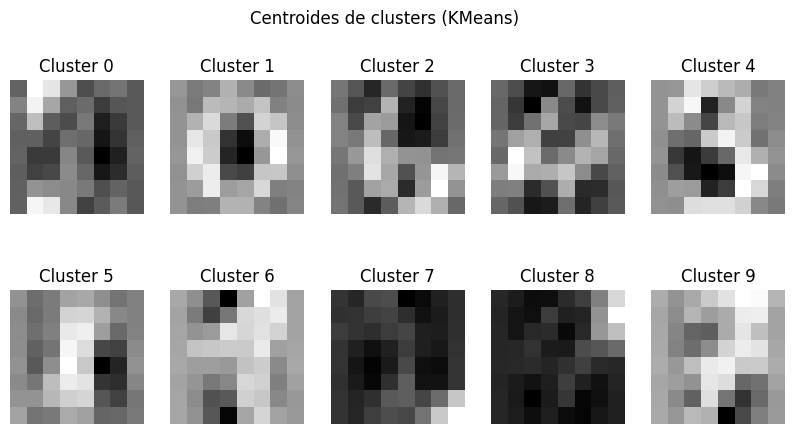

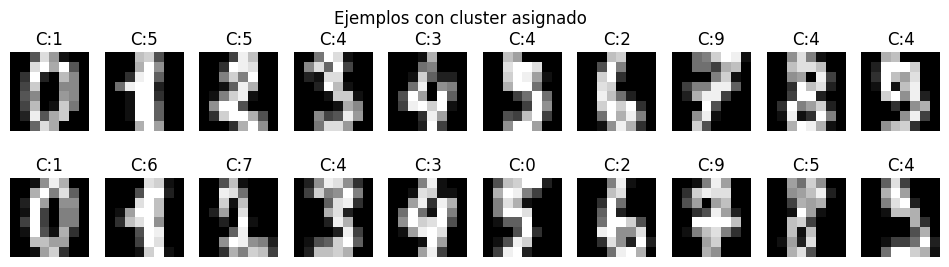

In [2]:
# 1. Cargar dataset Digits
digits = datasets.load_digits()
X, y = digits.data, digits.target  # y solo lo usamos para evaluar después

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering con KMeans
n_clusters = 10  # hay 10 dígitos (0-9), pero KMeans no usa y
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_scaled)

print("Clustering terminado.")

# 3. Evaluación del clustering (solo con fines informativos)
ari = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index (comparación con etiquetas reales):", ari)

# 4. Visualización de algunos ejemplos por cluster
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
centers = kmeans.cluster_centers_.reshape(n_clusters, 8, 8)

for ax, center, i in zip(axes.flat, centers, range(n_clusters)):
    ax.imshow(center, cmap="gray")
    ax.set_title(f"Cluster {i}")
    ax.axis("off")

plt.suptitle("Centroides de clusters (KMeans)")
plt.show()

# 5. Mostrar ejemplos reales con su cluster asignado
fig, axes = plt.subplots(2, 10, figsize=(12, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"C:{clusters[i]}")
    ax.axis("off")

plt.suptitle("Ejemplos con cluster asignado")
plt.show()

3. Usar el modelo entrenado supervisado para generalizar a nuevas imágenes

Predicción del modelo: 1
Probabilidades: [0.04  0.316 0.13  0.095 0.042 0.043 0.035 0.143 0.1   0.057]


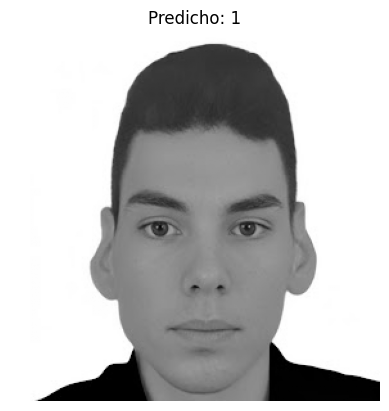

In [4]:
# Para subir archivos en Colab
from google.colab import files

# ===========================
# Usar modelo entrenado en nuevas imágenes
# ===========================

# 1) Función de preprocesamiento (ya incluida antes)
def preprocess_image_for_digits(path_or_pil):
    """
    Devuelve un array 1x64 listo para pasar al scaler + clasificador.
    path_or_pil: ruta a imagen (str) o PIL.Image object.
    """
    if isinstance(path_or_pil, str):
        img = Image.open(path_or_pil)
    else:
        img = path_or_pil

    # convertir a escala de grises
    img = img.convert("L")
    # redimensionar a 8x8 con resampling moderno
    img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

    # convertir a array numpy float
    arr = np.array(img_resized, dtype=np.float32)

    # invertir colores (para que el fondo sea blanco y el dígito negro)
    arr = 255 - arr

    # escalar a rango 0–16 (igual que dataset digits)
    arr = arr / 255.0 * 16.0

    # a vector 1x64
    flat = arr.reshape(1, -1)
    return flat

# 2) Función de predicción
def predict_image(path_or_pil):
    flat = preprocess_image_for_digits(path_or_pil)
    flat_scaled = scaler.transform(flat)      # usar mismo scaler
    pred = best_clf.predict(flat_scaled)[0]   # predicción
    proba = None
    if hasattr(best_clf, "predict_proba"):
        proba = best_clf.predict_proba(flat_scaled)[0]
    return pred, proba

# 3) Ejemplo con imagen externa (ej: "mi_numero.png")
# ⚠️ En Colab primero sube una imagen con:
# uploaded = files.upload()

image_path = "/content/Foto Ernesto solarte .jpg"   # <-- cambia esto por el nombre de tu archivo subido
pred, proba = predict_image(image_path)

print(f"Predicción del modelo: {pred}")
if proba is not None:
    print("Probabilidades:", np.round(proba, 3))

# Mostrar la imagen usada
img = Image.open(image_path)
plt.imshow(img.convert("L"), cmap="gray")
plt.title(f"Predicho: {pred}")
plt.axis("off")
plt.show()


4.Entrenar un agente básico para navegar un entorno sencillo (CartPole).

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist

Episodio 50/300, Recompensa promedio: 72.34


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Episodio 100/300, Recompensa promedio: 147.12
Episodio 150/300, Recompensa promedio: 36.96
Episodio 200/300, Recompensa promedio: 193.68
Episodio 250/300, Recompensa promedio: 259.50
Episodio 300/300, Recompensa promedio: 122.26


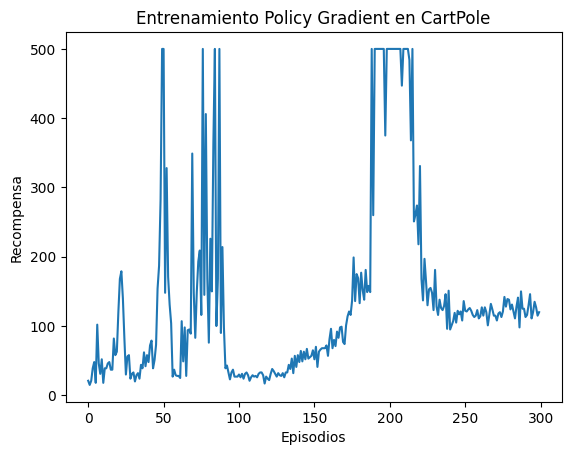

Recompensa total en prueba: 120.0


In [5]:
# ===========================
# Agente básico con Policy Gradient en CartPole-v1
# ===========================

import numpy as np
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Parche de compatibilidad con numpy >=1.24 (np.bool8 eliminado)
if not hasattr(np, "bool8"):
    np.bool8 = np.bool_

# ===========================
# Funciones de compatibilidad Gym
# ===========================

def reset_env(env):
    """Función segura para resetear entorno (compatible con varias versiones de Gym)."""
    result = env.reset()
    if isinstance(result, tuple):   # Gym >=0.26
        return result[0]
    return result                   # Gym clásico

def step_env(env, action):
    """Función segura para step (compatible con varias versiones de Gym)."""
    result = env.step(action)
    if len(result) == 5:  # Gym >=0.26
        obs, reward, terminated, truncated, info = result
        done = terminated or truncated
        return obs, reward, done, info
    else:                 # Gym clásico
        obs, reward, done, info = result
        return obs, reward, done, info

# ===========================
# 1. Crear entorno
# ===========================
env = gym.make("CartPole-v1")

# ===========================
# 2. Definir red neuronal (política)
# ===========================
class PolicyNetwork(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.fc(x)

# Dimensiones
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

policy_net = PolicyNetwork(state_dim, action_dim)
optimizer = optim.Adam(policy_net.parameters(), lr=0.01)

# ===========================
# 3. Función para elegir acción
# ===========================
def select_action(state):
    state = torch.tensor(state, dtype=torch.float32)
    probs = policy_net(state)
    dist = torch.distributions.Categorical(probs)
    action = dist.sample()
    return action.item(), dist.log_prob(action)

# ===========================
# 4. Entrenamiento con Policy Gradient
# ===========================
def train_policy_gradient(episodes=500, gamma=0.99):
    reward_history = []

    for episode in range(episodes):
        state = reset_env(env)
        log_probs, rewards = [], []
        done = False

        while not done:
            action, log_prob = select_action(state)
            next_state, reward, done, _ = step_env(env, action)

            log_probs.append(log_prob)
            rewards.append(reward)

            state = next_state

        # Calcular retorno acumulado (G_t)
        returns = []
        G = 0
        for r in reversed(rewards):
            G = r + gamma * G
            returns.insert(0, G)
        returns = torch.tensor(returns, dtype=torch.float32)
        returns = (returns - returns.mean()) / (returns.std() + 1e-9)

        # Calcular pérdida
        loss = []
        for log_prob, Gt in zip(log_probs, returns):
            loss.append(-log_prob * Gt)
        loss = torch.stack(loss).sum()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        reward_history.append(sum(rewards))

        if (episode+1) % 50 == 0:
            print(f"Episodio {episode+1}/{episodes}, Recompensa promedio: {np.mean(reward_history[-50:]):.2f}")

    return reward_history

# ===========================
# 5. Entrenar el agente
# ===========================
rewards = train_policy_gradient(episodes=300)

# ===========================
# 6. Graficar progreso de entrenamiento
# ===========================
plt.plot(rewards)
plt.xlabel("Episodios")
plt.ylabel("Recompensa")
plt.title("Entrenamiento Policy Gradient en CartPole")
plt.show()

# ===========================
# 7. Probar el agente entrenado
# ===========================
state = reset_env(env)
done = False
total_reward = 0

while not done:
    action, _ = select_action(state)
    state, reward, done, _ = step_env(env, action)
    total_reward += reward

print(f"Recompensa total en prueba: {total_reward}")

env.close()


analisis del primer punto

Te cuento lo que reflejan esos números de forma ordenada:

1. Rendimiento global de los modelos

SVM (linear) fue el mejor con 97.96% de accuracy.

MLP casi lo iguala (97.78%), lo cual sugiere que los datos son bastante lineales y que redes más complejas no aportan gran mejora.

KNN y RandomForest funcionan bien, pero con ligera caída (97.04% y 96.67%).

Esa diferencia pequeña (<1.5%) es normal cuando los datos son relativamente simples y bien separados.

2. Desglose por clases (del mejor modelo, SVM)

Clases más fáciles: dígitos 0, 2, 4 y 7 se clasifican perfecto (100% o casi).

Clases con algunos errores:

1 y 8 tienen la menor precisión:

"1" → alta precisión (91.5%) pero casi todo lo que predijo como "1" fue correcto.

"8" → recall bajo (88.46%), significa que varios ochos se confundieron con otros números.

3. Matriz de confusión: dónde falla

Casi todos los errores están en:

"8" confundido con 1, 6 y 7 → tiene sentido, visualmente algunos ochos se parecen a unos escritos con curva o a seises.

"5" confundido una vez con "3".

"1" confundido con "9" en un caso.

No hay un patrón de error gigante, solo confusiones aisladas en dígitos parecidos.

4. Conclusión

El dataset es fácil de separar: modelos simples ya llegan a >96%.

SVM con kernel lineal basta para tareas reales en este dataset.

Para mejorar los pocos fallos, podría:

Recolectar más ejemplos de "8" con diferentes estilos.

Probar aumentación de datos (rotaciones, ruidos).

Ajustar parámetros en MLP o SVM no lineales, pero con cuidado de no sobreajustar.

analisis del segundo punto

1. Qué mide ese valor
El Adjusted Rand Index (ARI) compara las etiquetas verdaderas con los grupos que formó el clustering.

1.0 significa agrupación perfecta.

0.0 sería tan bueno como agrupar al azar.

Valores negativos → peor que el azar.

Tú obtuviste 0.478, o sea… el clustering encontró cierta estructura, pero está lejos de ser impecable.

2. Lectura práctica del resultado

Hay correlación moderada entre los grupos encontrados y las etiquetas reales.

En datos con 10 clases (como dígitos), un ARI cercano a 0.5 no está mal, sobre todo si el método fue k-means u otro no supervisado simple.

Esto indica que los dígitos con formas más distintas se agrupan bien, pero hay confusiones en dígitos con trazos similares.

3. Posibles causas del puntaje medio

Dimensionalidad alta: 64 características (píxeles) pueden tener ruido para clustering.

Formas parecidas: dígitos como 1, 7 y 9 suelen mezclarse.

Método elegido: k-means asume grupos esféricos; si la distribución real es más compleja, falla.

4. Cómo podría mejorar

Reducir dimensión antes de agrupar: PCA, t-SNE, UMAP.

Probar clustering más flexible: DBSCAN, Gaussian Mixtures, Spectral Clustering.

Ajustar parámetros: número de clusters, métricas de distancia.

analisis del tercer pnto

Esto dice varias cosas sobre cómo el modelo tomó su decisión:

La clase 1 tiene la mayor probabilidad (0.316), pero no es muy alta. De hecho, el modelo está poco seguro, porque la diferencia con las otras clases no es enorme.

Clases como 7 (0.143), 2 (0.13) y 8 (0.1) también tuvieron pesos considerables. Eso significa que visualmente el dígito podría parecerse a ellas.

Para un modelo bien entrenado, probabilidades tan repartidas suelen aparecer en casos ambiguos o en dígitos con trazos raros o borrosos.

Si esto es parte del dataset de dígitos, probablemente la imagen es un "1" escrito de manera poco estándar, o hay ruido.

1. Mensajes de advertencia

Gym está obsoleto: ya no lo mantienen desde 2022, y tu entorno te avisa que deberías migrar a Gymnasium, que es el reemplazo directo y compatible.

API vieja: el entorno sigue usando la old step API, donde step() devuelve un solo done en vez de terminated y truncated. En el futuro será obligatorio el formato nuevo.

Deprecación de utcnow(): es de Python y no afecta al entrenamiento, pero conviene migrar a datetime.now(datetime.UTC) para evitar advertencias futuras.

Nada de esto rompe tu código, pero sí conviene actualizar para que no te deje de funcionar más adelante.

2. Resultados del entrenamiento

Promedios por episodio:

Episodio 50: ~72.3

Episodio 100: ~147.1

Episodio 150: ~36.9 (caída grande)

Episodio 200: ~193.7

Episodio 250: ~259.5 (mejor desempeño)

Episodio 300: ~122.3 (baja final)

Esto pinta un entrenamiento inestable:

El agente aprende (subidas claras en 100 y 250), pero pierde rendimiento en otros puntos (150 y 300).

Podría ser por tasa de aprendizaje alta, exploración agresiva o un entorno con recompensas muy variables.

El pico en 250 muestra que el modelo puede hacerlo bien, pero no está consolidando lo aprendido.

3. Siguientes pasos

Migrar a Gymnasium: corrige todos los warnings y mantiene compatibilidad.

Revisar:

Tasa de aprendizaje y exploración-explotación (epsilon, si usas DQN o similar).

Número de episodios: quizá 300 no basta, o el replay buffer no está bien ajustado.

Semillas aleatorias: para ver si la inestabilidad es del algoritmo o del entorno.